# Exploratory Data Analysis (EDA)
 
In the EDA we have to show descriptive the data using basic statistics:
- 1. For continuous numeric variables, we use the following statistics:
    - 1.1 Mean and Standard deviation
    - 1.2 Median and Interquartile rate
    - 1.3 Minimum and Maximum
    - 1.4 Percentage of missing values
 
- 2. For Nominal and ordinal data (categorical data):
    - 2.1 Frequencies (% of each category - ordered in descending order)
    - 2.2 % of missing values
 
We also will show graphs which will help us unsderstand the type of distributions of numeric data and for categorical data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
varnm = ['class','alcohol','malic_acid','ash','alcalinity_ash','magnesium','phenols','flavanoids','nonflavanoid_phenols',
'proanthocyanins','color_intensity','hue','OD280_OD315','proline']            

X = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=0,names=varnm)
X.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
## use describe() to get the descriptive statistics
X.describe()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [34]:
X.dtypes

class                     int64
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_ash          float64
magnesium                 int64
phenols                 float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
OD280_OD315             float64
proline                   int64
dtype: object

In [35]:
## determine the number of missing values
X.isna().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_ash          0
magnesium               0
phenols                 0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
OD280_OD315             0
proline                 0
dtype: int64

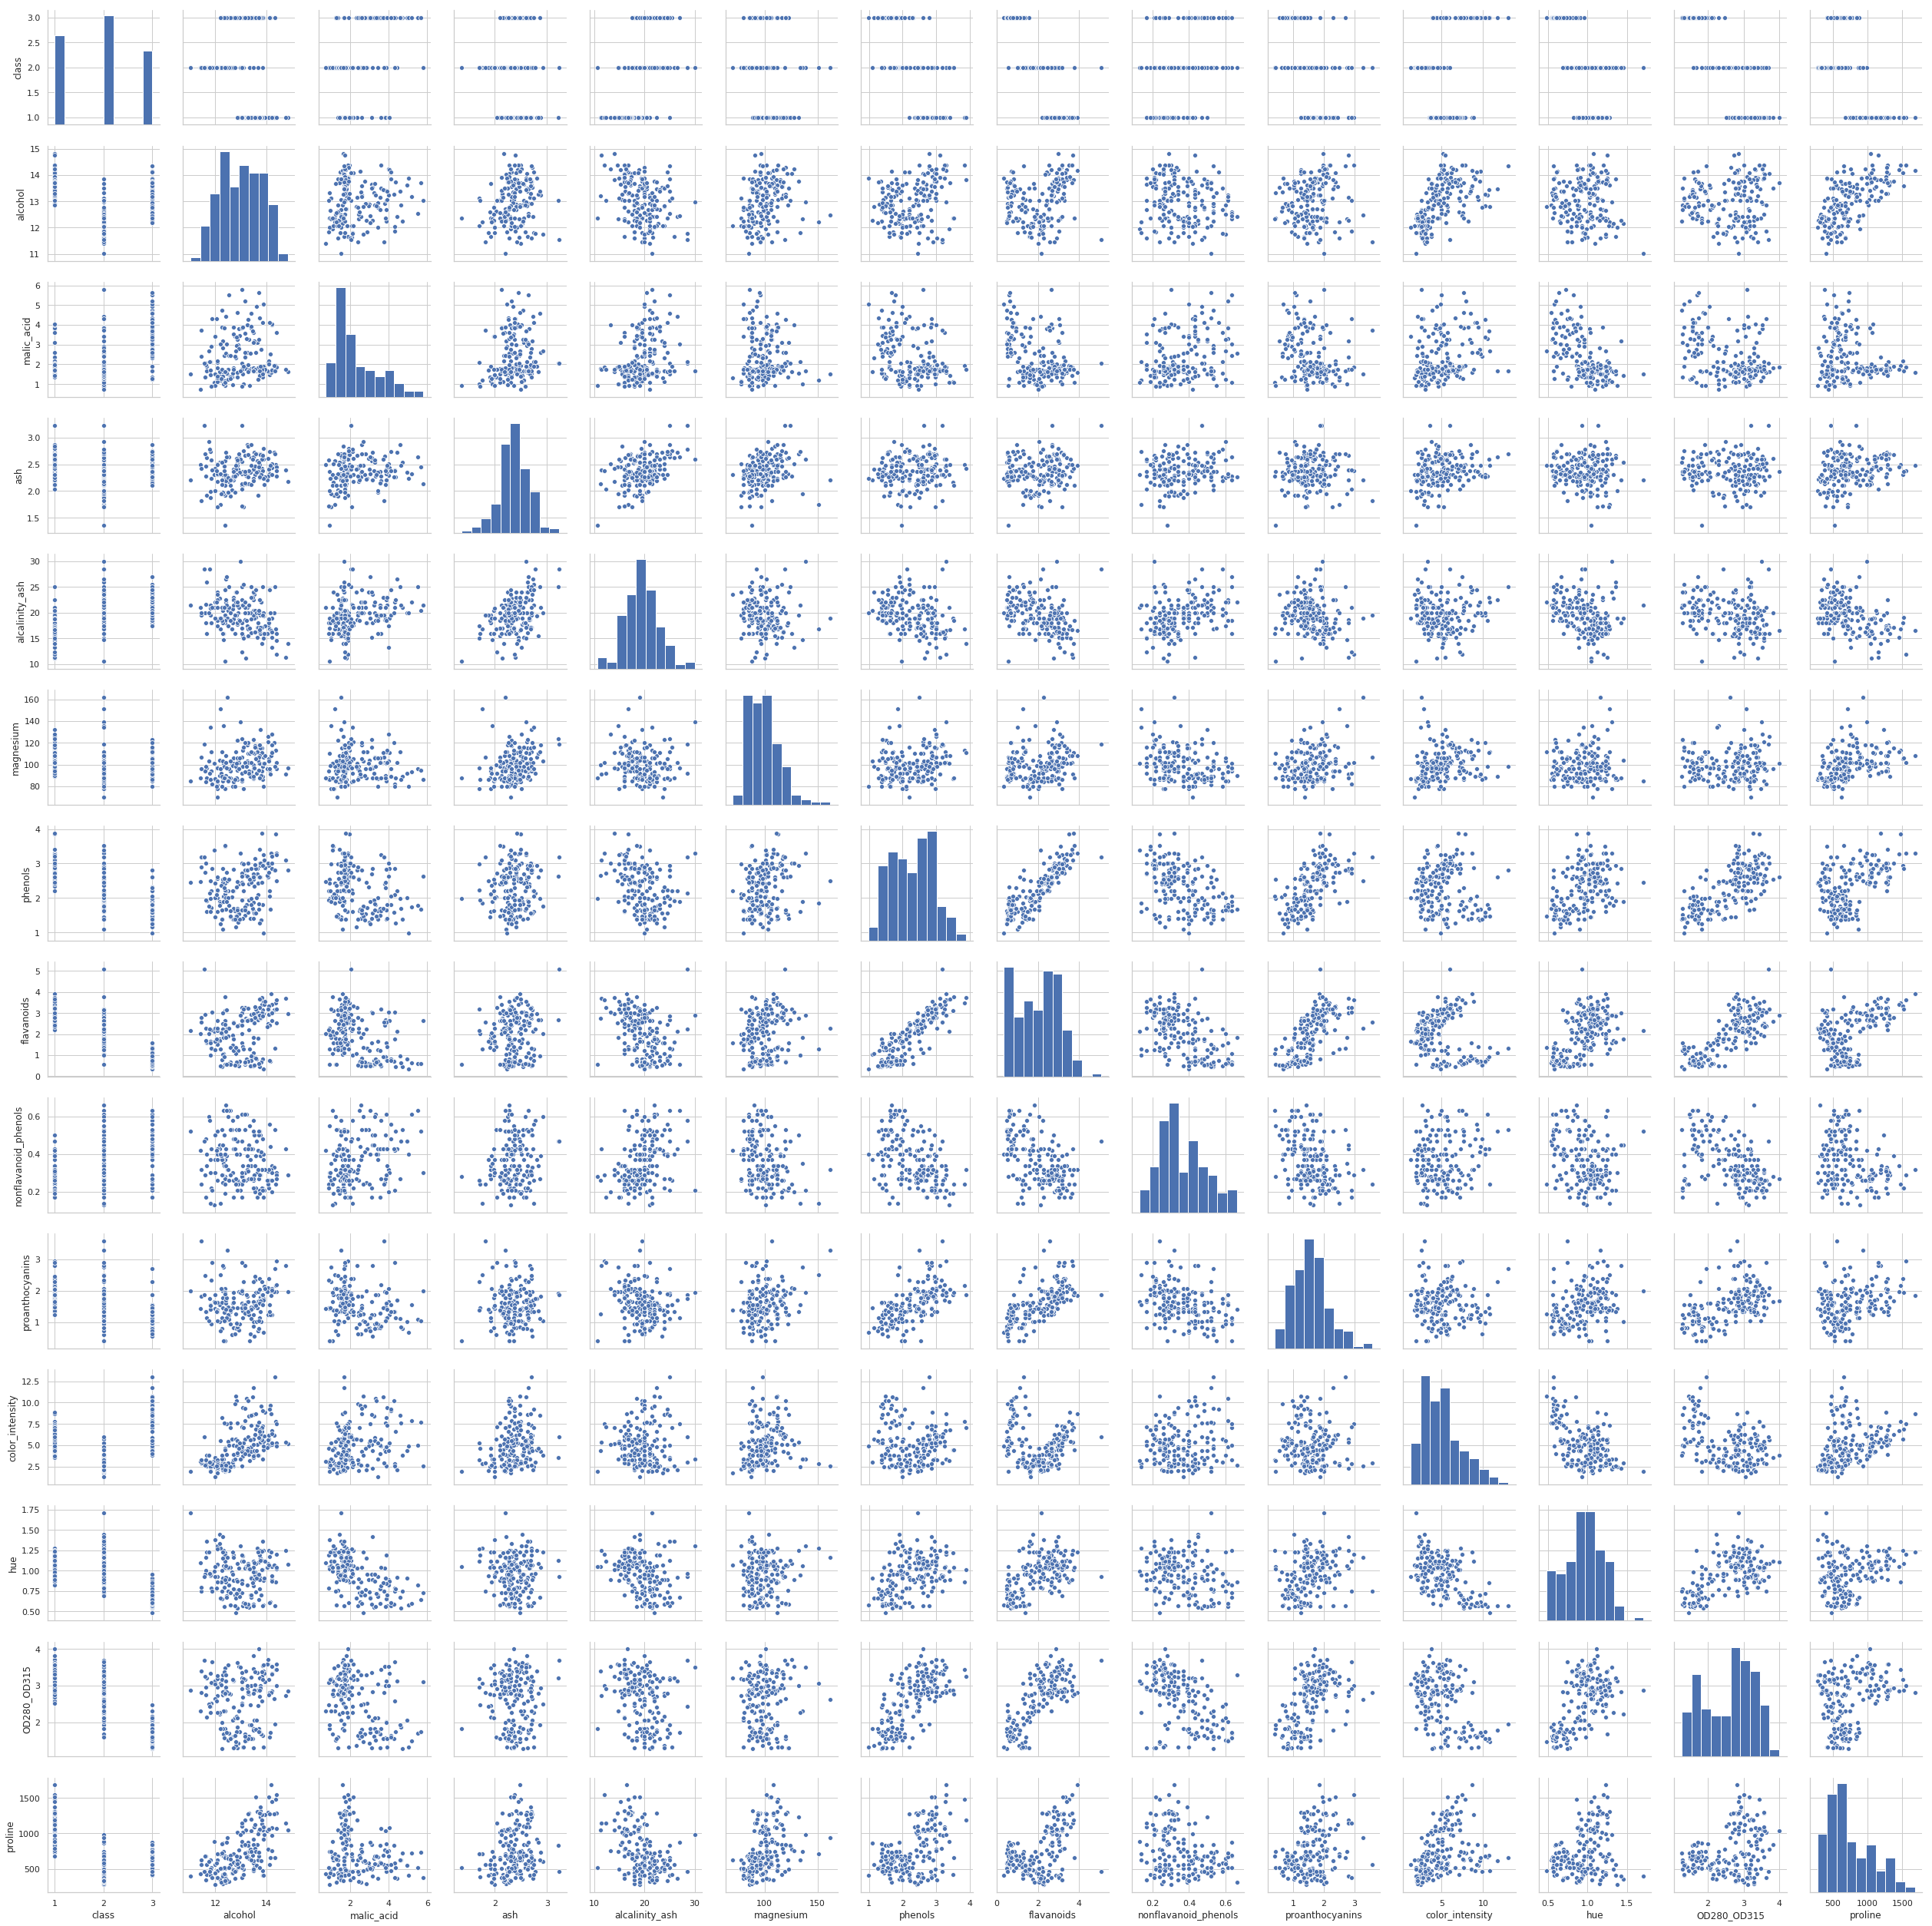

In [36]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
sns.pairplot(X)

## Univariate Outlier detection for continuous numeric variables
 
#### Using Standard Deviation (z-scores)

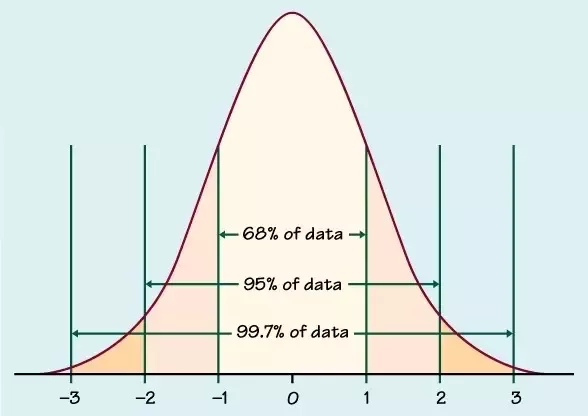

#### Using median and Interquartile range (Boxplot)

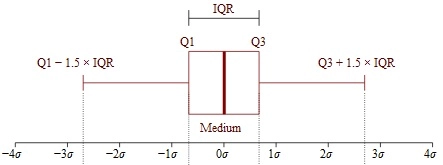

In [6]:
def zscore_outliers(x, cutoff=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    dmean = x.mean()
    dsd = x.std()
    rng = dsd * cutoff
    lower = dmean - rng
    upper = dmean + rng
    if return_thresholds:
        return lower, upper
    else:
        return [True if z < lower or z > upper else False for z in x]


def iqr_outliers(x, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if z < lower or z > upper else False for z in x]

In [46]:
zscore_outliers(X['alcalinity_ash'], cutoff=3.0, return_thresholds=False)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

It seems malic acid has outliers

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


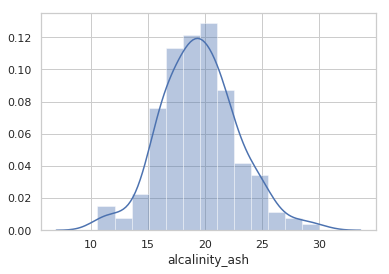

In [52]:
import seaborn as sns
ax=sns.distplot(X['alcalinity_ash'])

In [51]:
iqr_outliers(X['malic_acid'].tolist(),k=1.5,return_thresholds=True)

(10.749999999999998, 27.950000000000003)

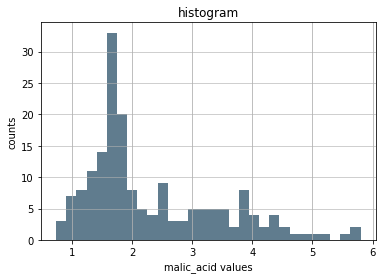

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

X['malic_acid'].plot.hist(grid=True, bins=30, rwidth=1.9,
                   color='#607c8e')
plt.title('malic histogram')
plt.xlabel('malic_acid values')
plt.ylabel('counts')
plt.grid(axis='y', alpha=0.75)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


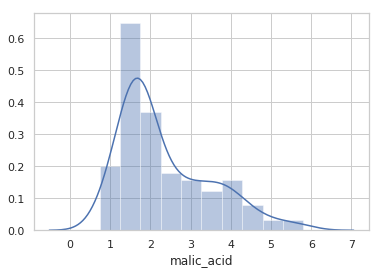

In [42]:
import seaborn as sns
ax=sns.distplot(X['malic_acid'])

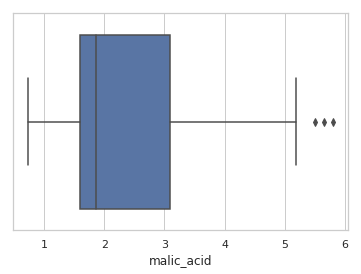

In [40]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(X['malic_acid'])

## Multivariate Outlier Analysis

For multivariate outlier detection we can use DBSCAN. This algorithm search for aggregation of points that are combined and leave out of them the outlier points.

<img src="https://en.proft.me/media/science/r_dbc_points.png"> </img>



In [48]:
## X is an numpy array
def dbscan_mvoutliers(X):
    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import StandardScaler
    # scale data first
    X = StandardScaler().fit_transform(X.values)

    db = DBSCAN(eps=3.0, min_samples=10).fit(X)
    labels = db.labels_

    plt.figure(figsize=(10,10))

    unique_labels = set(labels)
    colors = ['blue', 'red']

    for color,label in zip(colors, unique_labels):
        sample_mask = [True if l == label else False for l in labels]
        plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
    plt.xlabel('x');
    plt.ylabel('y');
    return(db)

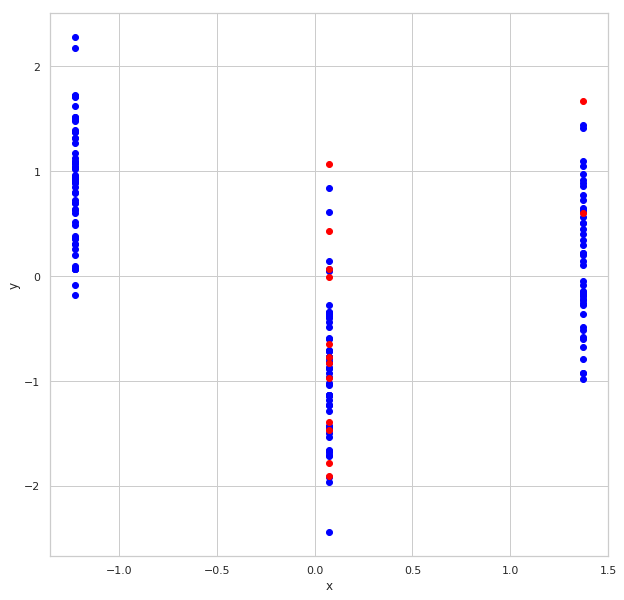

In [49]:
dbsc1=dbscan_mvoutliers(X)

In [50]:
dbsc1.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

### Treating outliers: To drop or not to drop?
 
- If it is obviously due to incorrectly entered or measured data,  drop it 
- If it does not change the results but does affect assumptions, drop it (report!)
- If it affects both results and assumptions. Don’t drop it. (Analyze with and without. Report!)
- If it creates a significant association, drop it



In [27]:
### Check if outliers modify 
outliers = outliers.astype('int64')

for c in X.columns:
    v1 = X.loc[outliers[c]==0,c]
    v2 = X.loc[:,c]
    print([c,v1.mean(),v2.mean(),outliers[c].sum()])
    
#X * outliers.astype('int64')

NameError: name 'outliers' is not defined

In [ ]:
varnm = ['malic_acid','ash','alcalinity_ash','magnesium','flavanoids','proanthocyanins','color_intensity','hue']  

In [ ]:
for i in range(0,7):
    fig, ax = plt.subplots(1, sharex='col', sharey='row')
#for c in varnm:
    plt.hist(X[varnm[i]])
    plt.hist(X.loc[outliers[varnm[i]]==0,varnm[i]])

# Missing Values

In [ ]:
### pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = X.columns[animals.isnull().any()].tolist()
msno.matrix(X[missingdata_df])

In [ ]:
msno.heatmap(X[missingdata_df], figsize=(5,5))

In [ ]:
X2 = X.copy()
for c in X2.columns:
    if X2[c].isnull().sum()>0 :
        newnm = c + '_na'
        X2[newnm] = 0
        X2.loc[(X2[c].isnull()),[newnm]] = 1
X2.head()

In [ ]:
## select variables with full data
fulldt = [...] 
y_train = X2.loc[:,(<<var_na>>)]
X_train = X_train.loc[:,fulldt]


In [ ]:
### repeat this for each variable having missing values
import statsmodels.api as sm

cnst = sm.add_constant(X_train)
est = sm.OLS(y_train, cnst)
est2 = est.fit()
print(est2.summary())

## Missing Values Imputation

### Dropout

In [ ]:
X2 = animals.copy()
# drop rows with missing values
X2.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(X2.shape)


In [ ]:
### check for changes in the statistics
print(X.describe())
print("----------------------------------------------------------------------------------")
print(X2.describe())

### Statistical Imputation
 
This imply to substitute missing values by a statistical measure. The most commonly used are the mean and the median.

In [44]:
# impute mean for the following vars: sws, ps, ts, mls, gt
X2 = X.copy()
for c in X2.columns:
    if X2[c].isnull().sum()>0 :
        mn = X2[c].mean()
        X2[c] = X2[c].fillna(mn)
X2.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
### check for changes in the statistics
print(X.describe())
print("----------------------------------------------------------------------------------")
print(X2.describe())

In [ ]:
### print a graph for each imputed variable (repeat for each)
sns.scatterplot(x=<<var>>,y=<<other_complete_var>>,data=X2)

In [ ]:
# impute median for the following vars: sws, ps, ts, mls, gt
X2 = X.copy()
for c in X2.columns:
    if X2[c].isnull().sum()>0 :
        mn = X2[c].median()
        animals2[c] = animals2[c].fillna(mn)
X2.head()

In [ ]:
### check for changes in the statistics
print(X.describe())
print("----------------------------------------------------------------------------------")
print(X2.describe())

In [ ]:
### print a graph for each imputed variable (repeat for each)
sns.scatterplot(x=<<var>>,y=<<other_complete_var>>,data=X2)

### Machine Learning imputation: kNN imputation

In [ ]:
X_train = X2.copy()
fulldt = [...] 
X_train.dropna(inplace=True)
y_train = X_train.loc[:,(<<var_with_miss>>]
X_train = X_train.loc[:,(fulldt)]
print(y_train.shape)
print(X_train.shape)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)  
reg.fit(X_train, y_train)  

In [ ]:
X_test = X2.loc[(X2[<<var_with_miss].isnull()),fulldt]
y_pred = reg.predict(X_test)

In [ ]:
len(y_pred)
y_train1 = pd.DataFrame({'y':y_train, 'miss_var':X_train['miss_var']})
y_train1[<<other_var>>] = 0

y_pred1 = pd.DataFrame({'y':y_pred, 'miss_var':X_test['miss_var']})
y_pred1[<<other_var>>] = 1

y = pd.concat([y_train1,y_pred1])
y.head()

In [ ]:
### plot the vars
sns.scatterplot(x='miss_var',y='y', data=y,hue=<<other_var>>)